In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
df= pd.read_csv('mushroom.csv')
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [6]:
# Basic exploration

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [7]:
# Histograms for numerical features

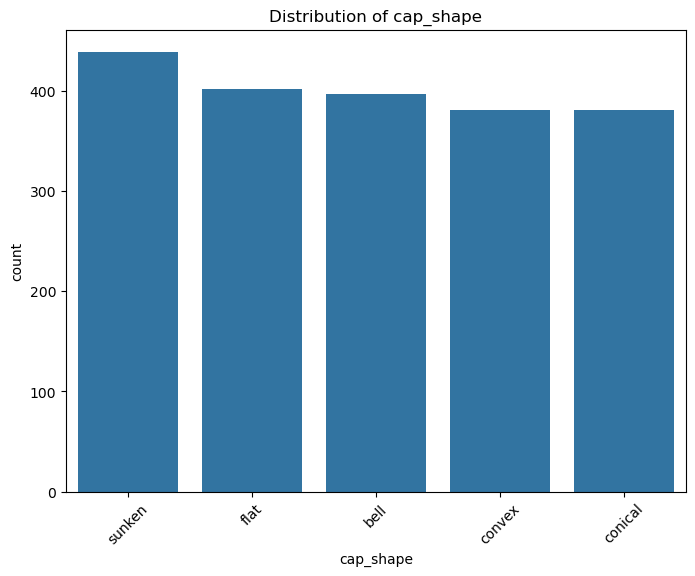

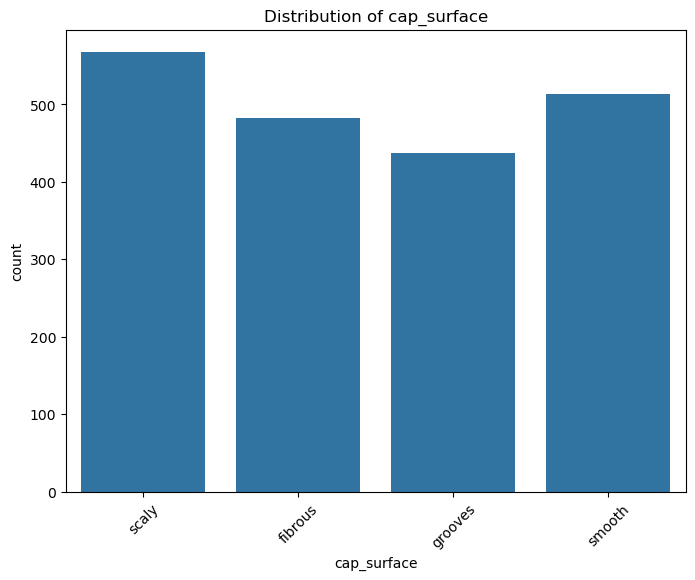

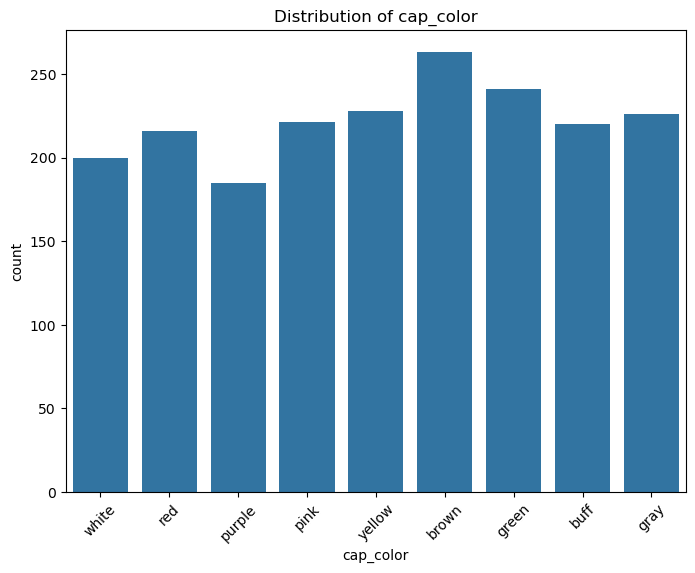

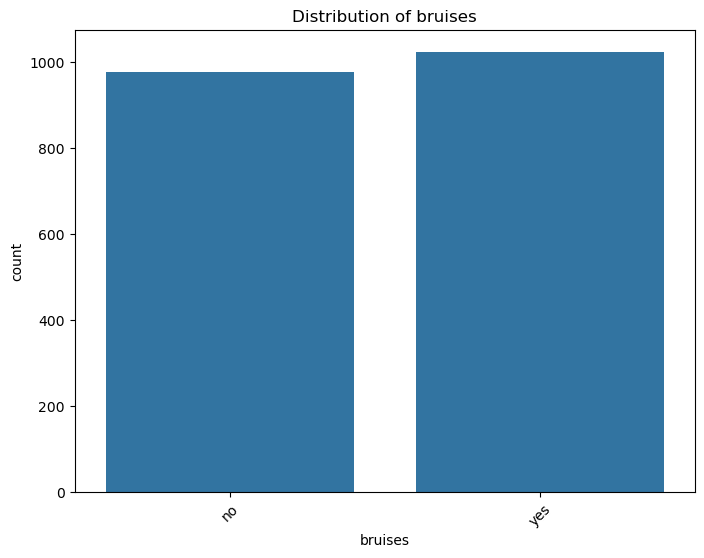

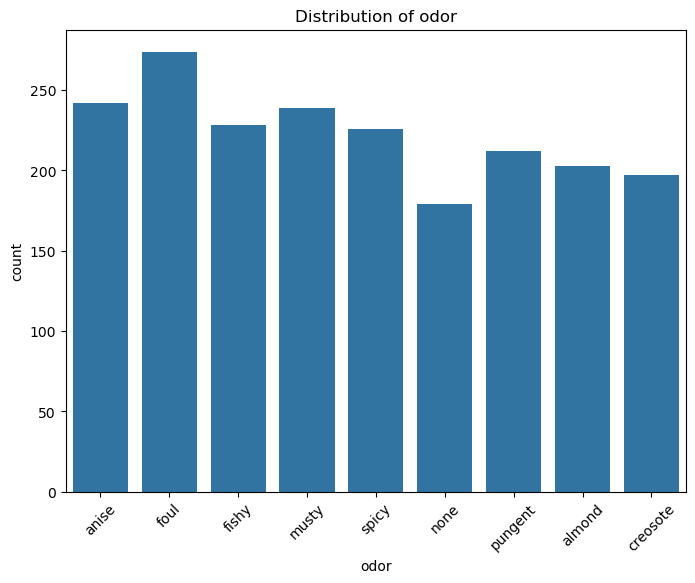

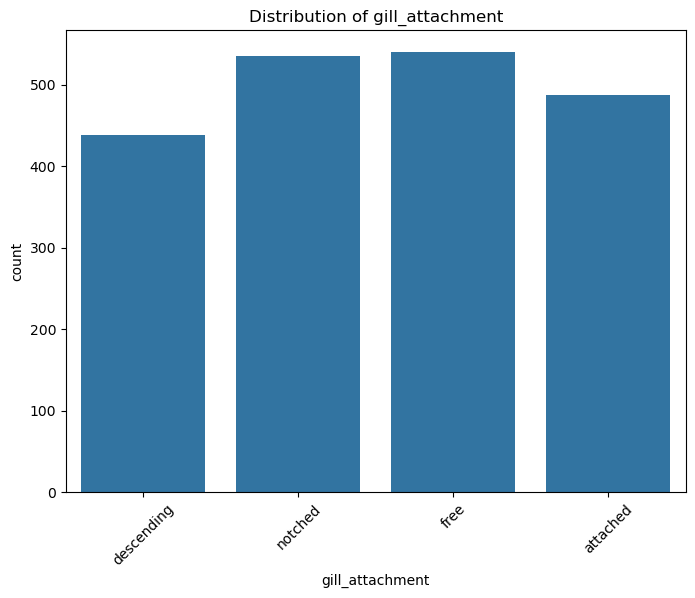

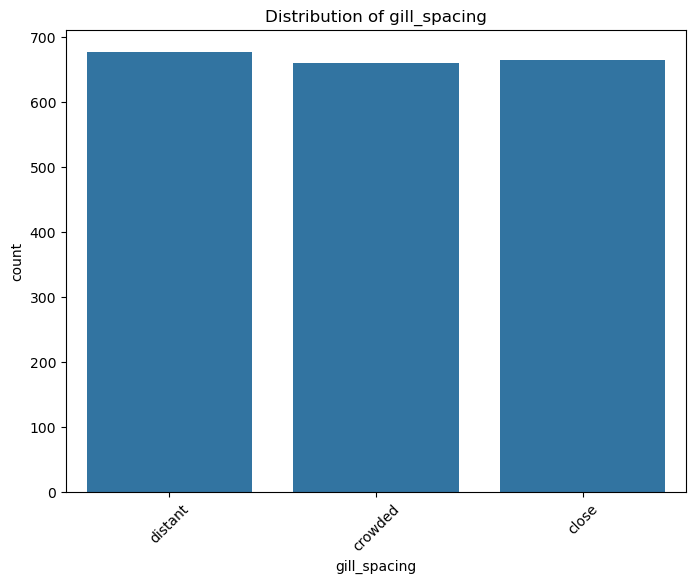

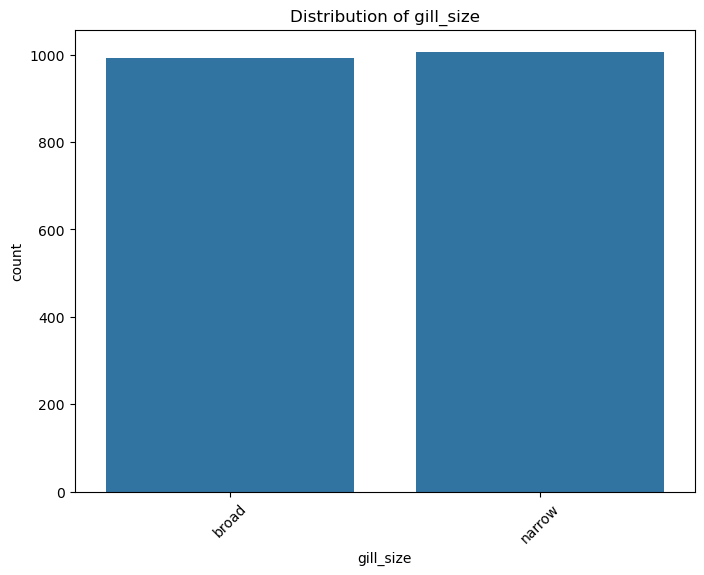

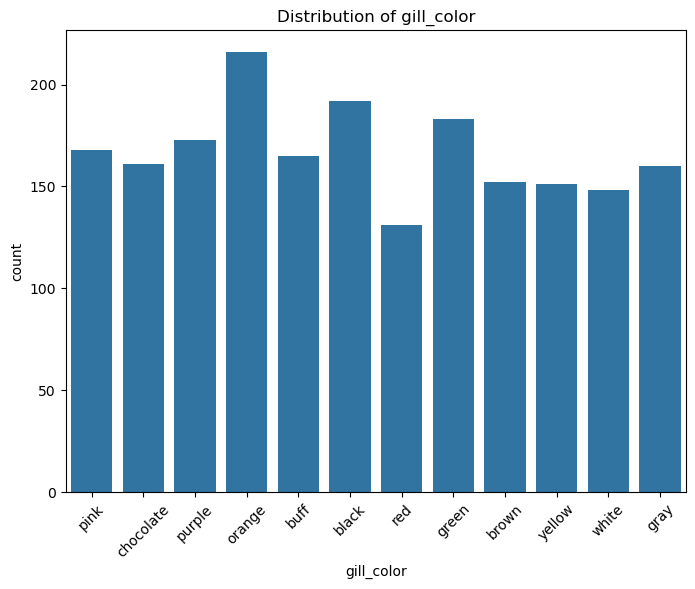

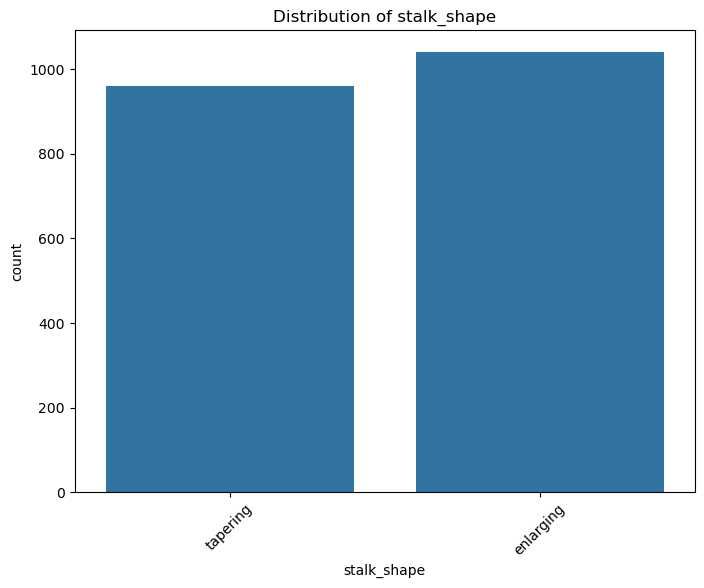

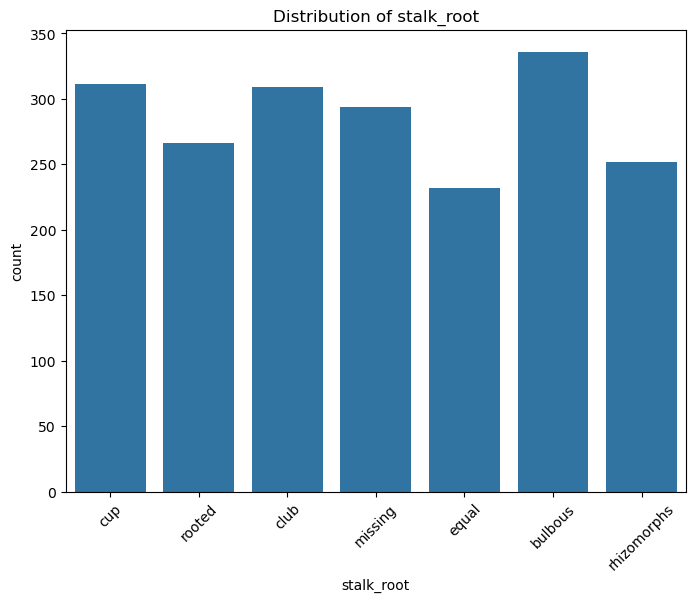

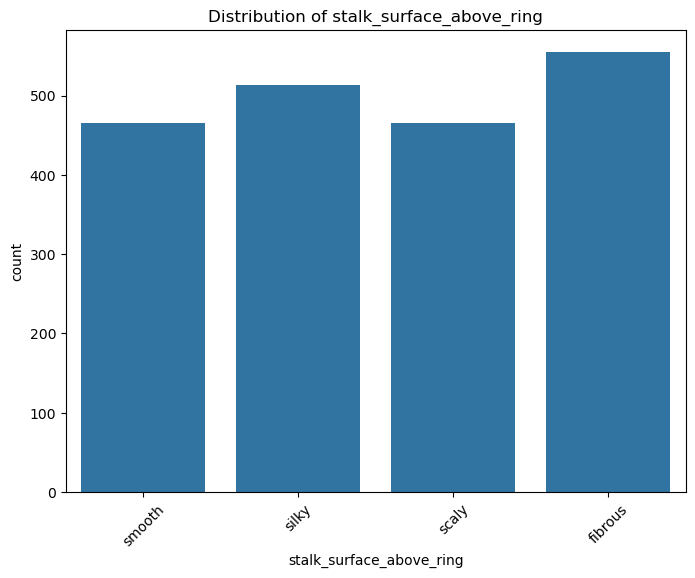

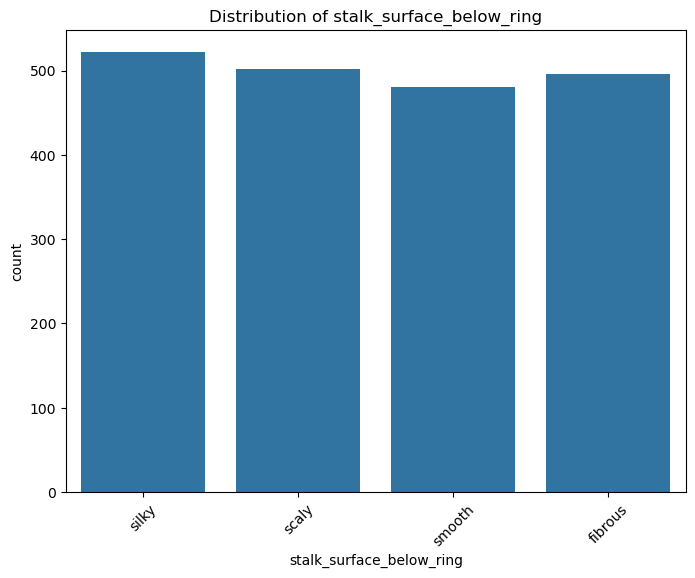

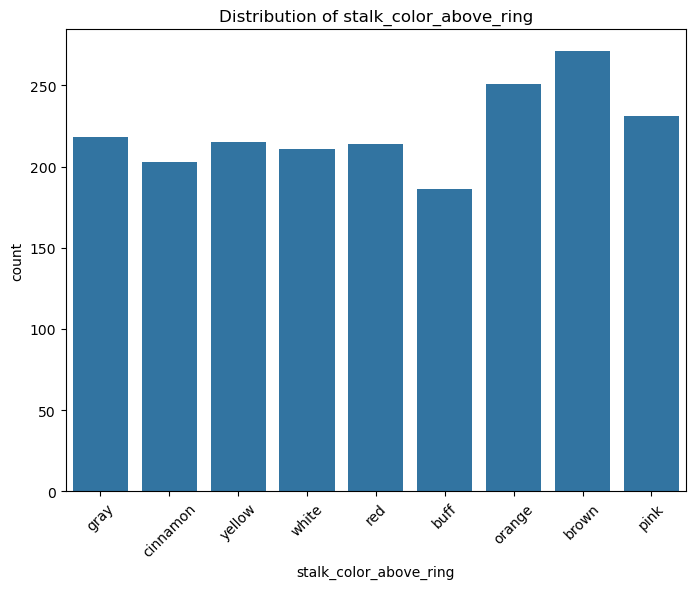

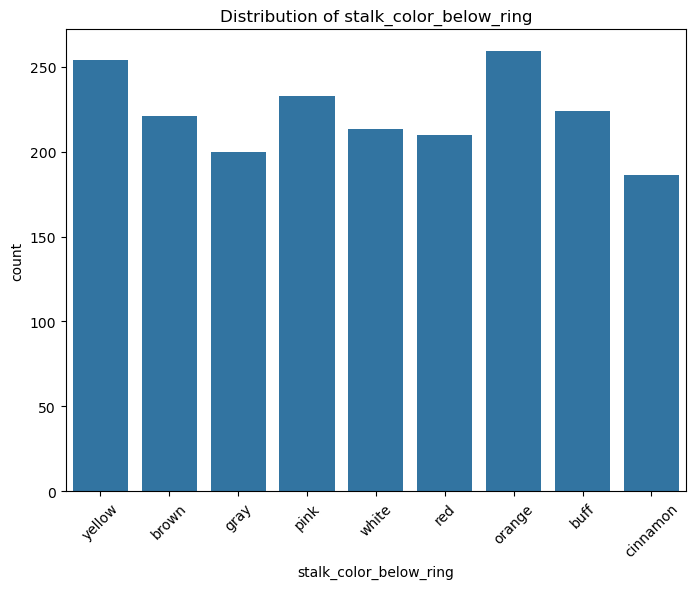

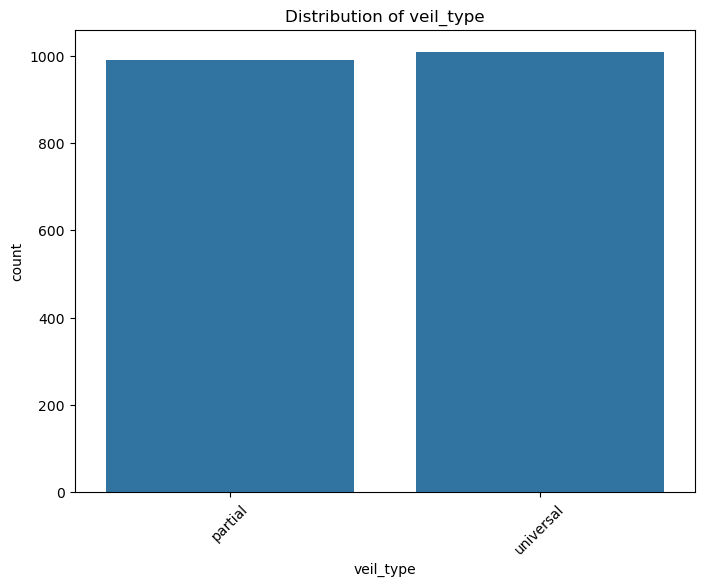

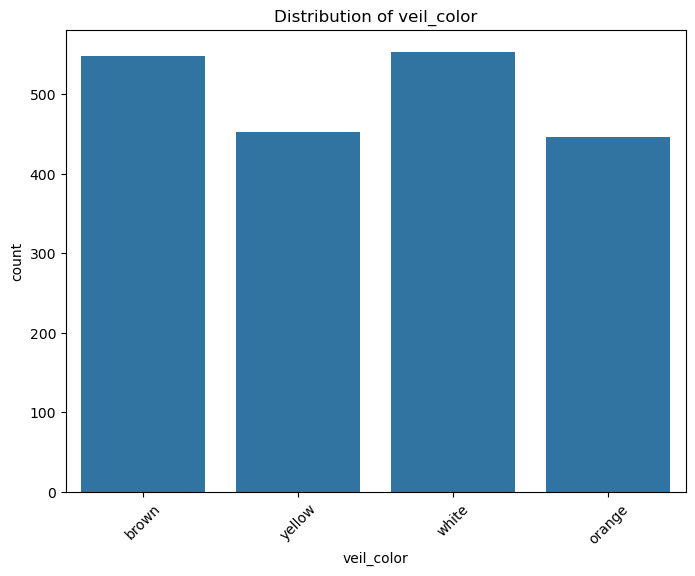

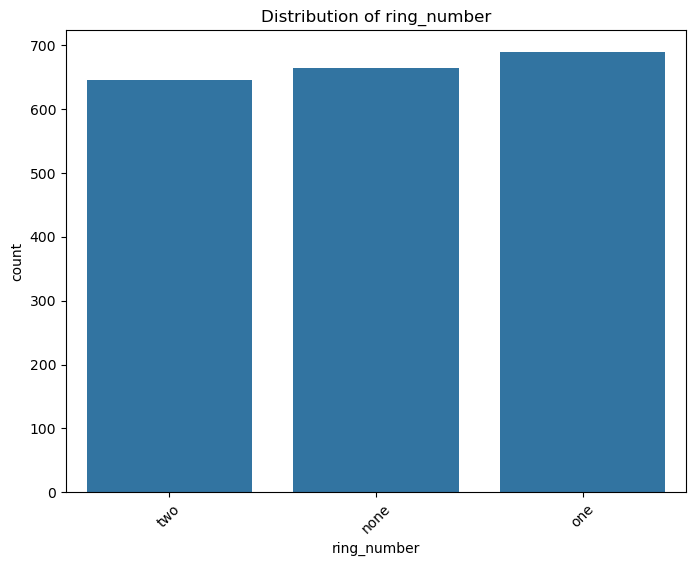

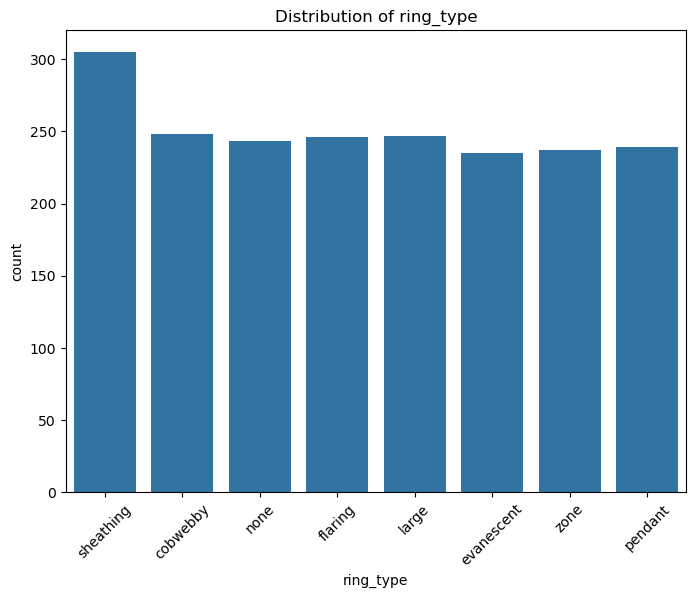

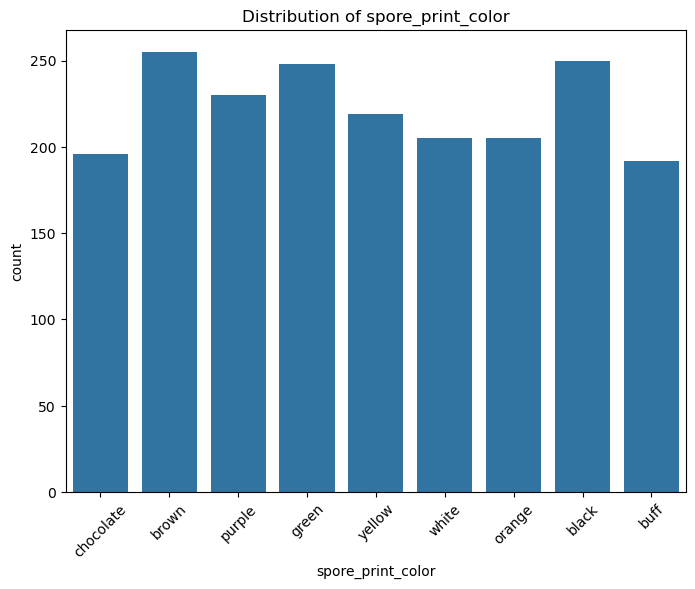

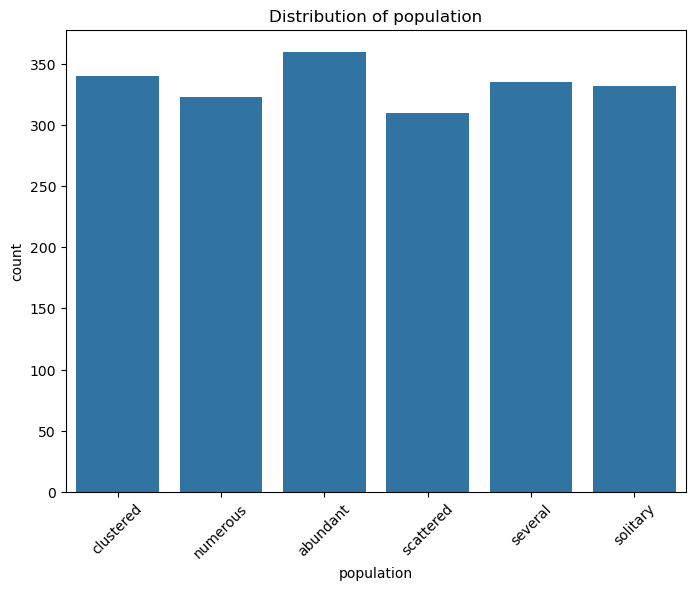

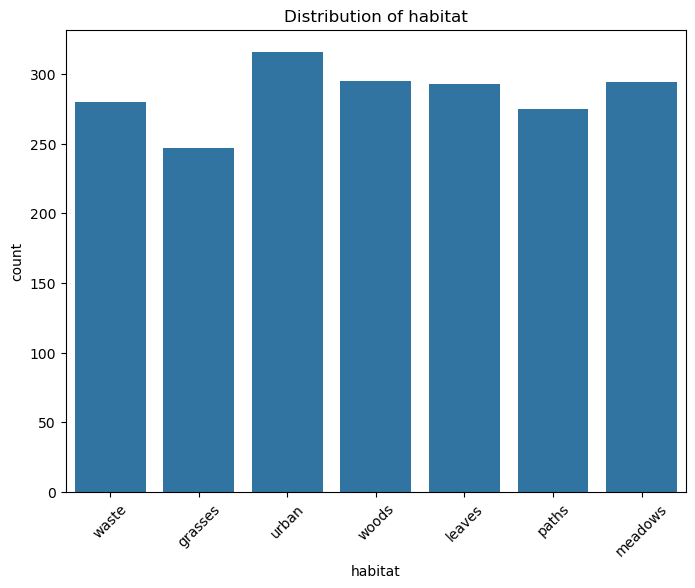

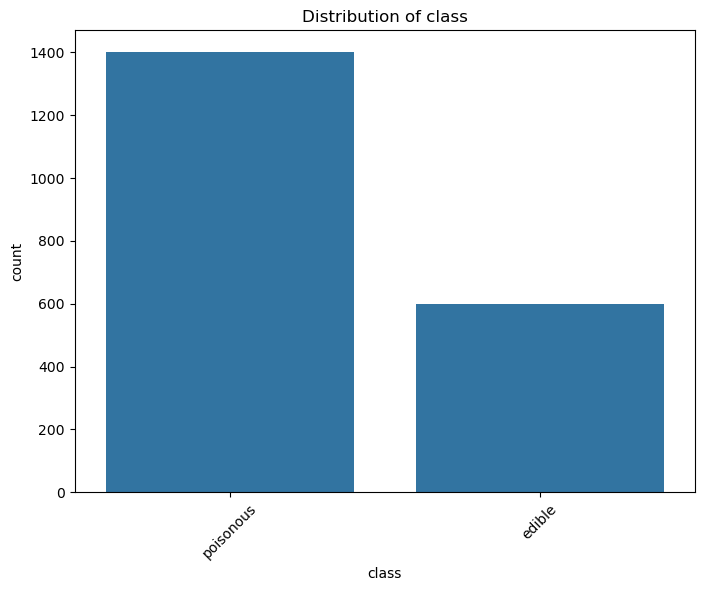

In [8]:
# EDA - Histograms/Count Plots (Categorical)
for column in df.columns:
    if df[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=column)
        plt.title(f'Distribution of {column}')
        plt.xticks(rotation=45)
        plt.show()    

In [17]:
numerical_columns = ['stalk_height', 'cap_diameter']


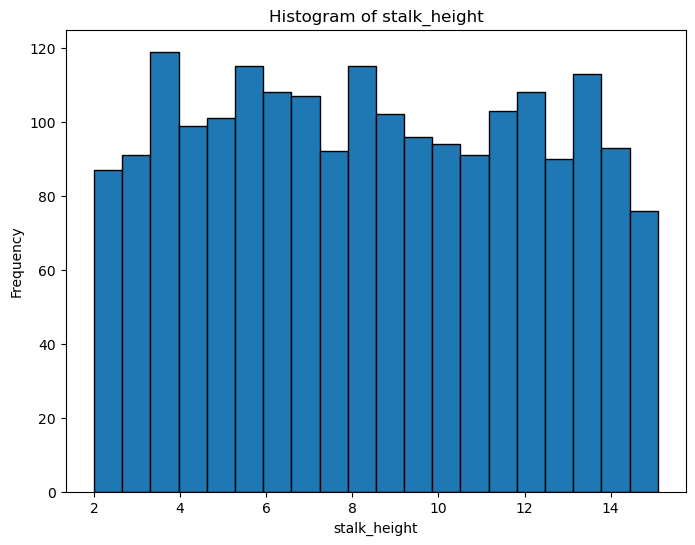

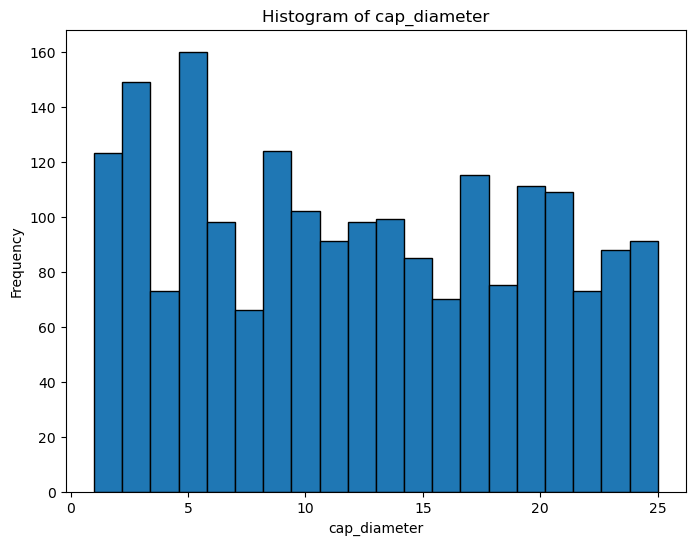

In [20]:
for column in numerical_columns:
    if column in df.columns:  # Check if the column exists in the DataFrame
        plt.figure(figsize=(8, 6))
        plt.hist(df[column].dropna(), bins=20, edgecolor='black')  # Handle potential NaN values
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    

In [21]:
# EDA - Correlation Heatmap (After Encoding)
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
corr = df_encoded.corr()

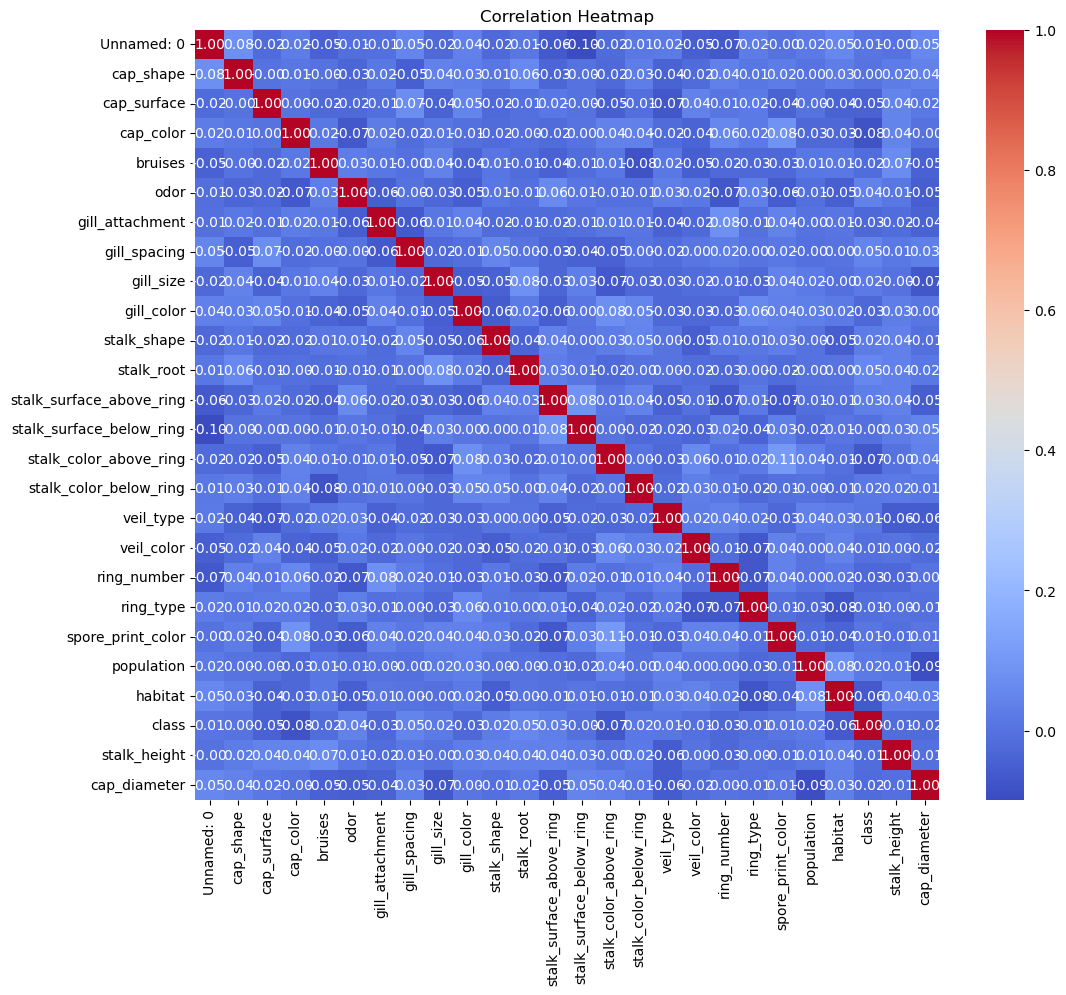

In [22]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
# Data Preprocessing - Encoding
for column in df.columns:
    df[column] = le.fit_transform(df[column])



In [27]:
# Data Preprocessing - Splitting Data
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

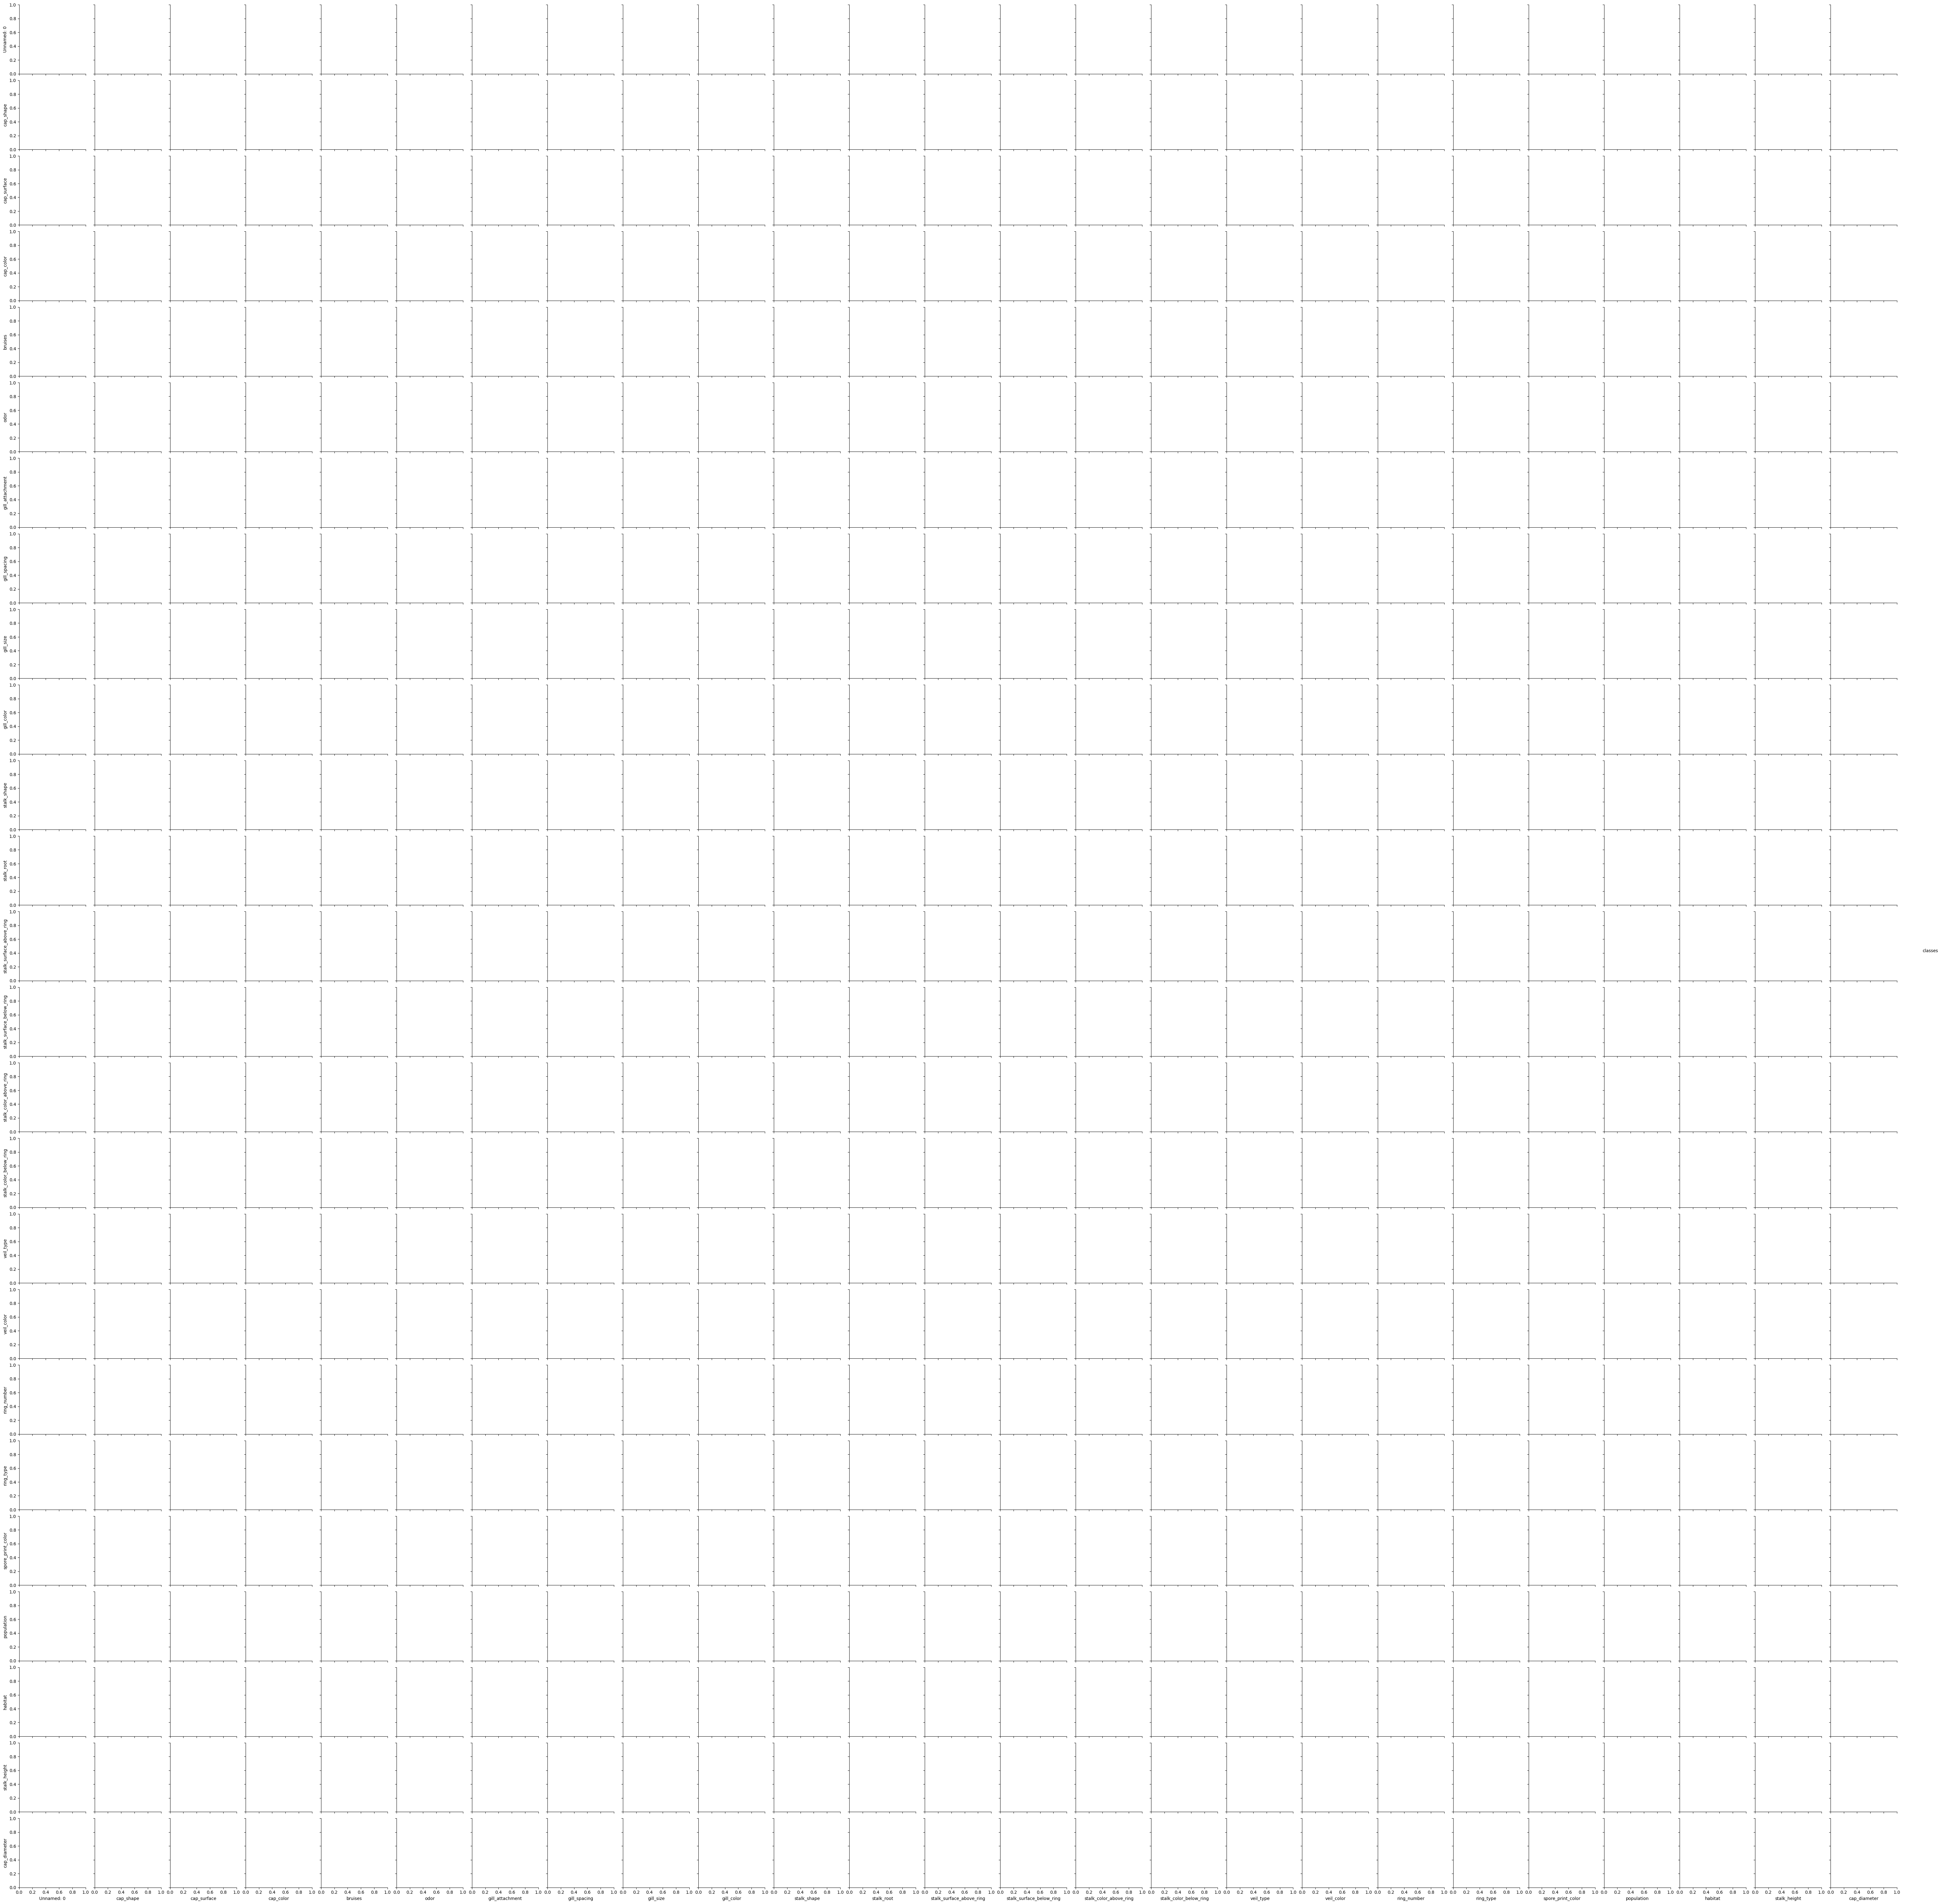

In [50]:
# Pair Plot
sns.pairplot(pd.concat([pd.DataFrame(X_train_scaled, columns=X.columns), pd.DataFrame(y_train, columns=['classes'])], axis=1), hue='classes')
plt.show() #less informative 

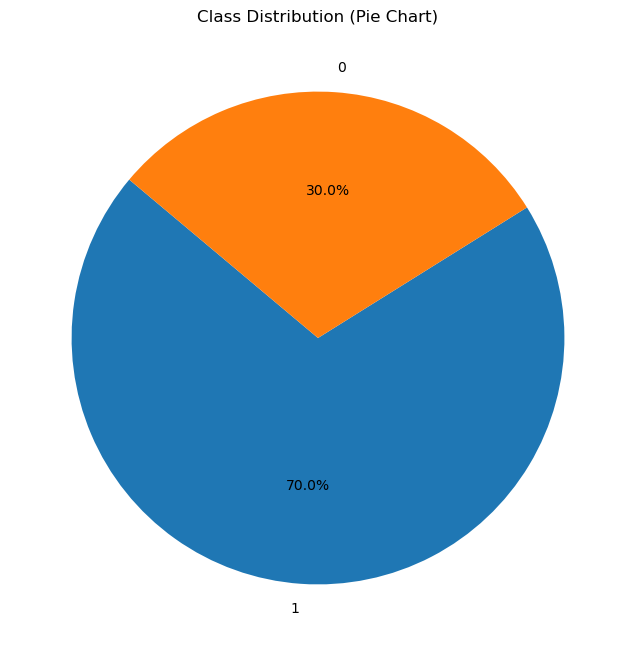

In [49]:
# Visualize Class Distribution using Pie Chart (Matplotlib)
class_counts = df['class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution (Pie Chart)')
plt.show()

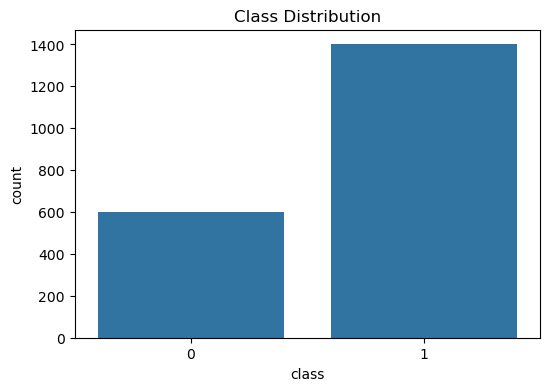

In [29]:
# Data Visualization - Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class')
plt.title("Class Distribution")
plt.show()

In [34]:
# Data Preprocessing - Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Check Class Imbalance
print("Class distribution in training set:")
print(y_train.value_counts())

Class distribution in training set:
class
1    1133
0     467
Name: count, dtype: int64


In [37]:
# SVM Implementation - Basic Model (with scaled data)
svm = SVC(kernel='linear',class_weight='balanced') # Try linear first
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print("\nBasic SVM Performance (Scaled Data):")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Basic SVM Performance (Scaled Data):
              precision    recall  f1-score   support

           0       0.35      0.50      0.41       133
           1       0.68      0.53      0.60       267

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.51       400
weighted avg       0.57      0.52      0.54       400

[[ 67  66]
 [125 142]]


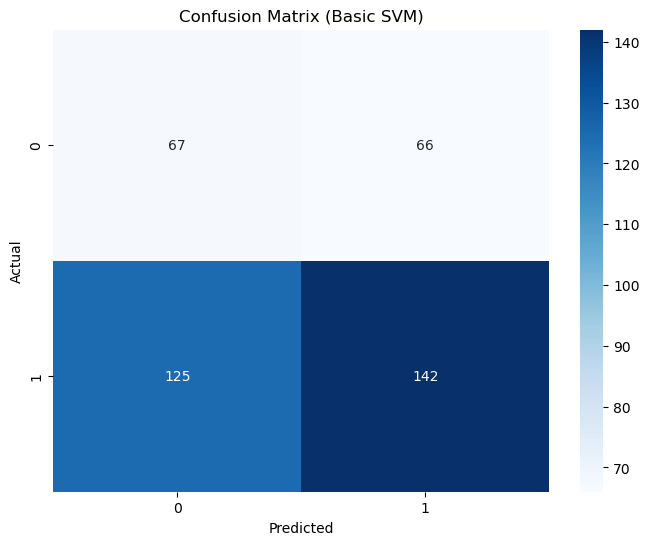

In [39]:
# Visualization - Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Basic SVM)')
plt.show()

In [38]:
# Parameter Tuning - Grid Search (with scaled data and class_weight)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=3) # Added class_weight
grid.fit(X_train_scaled, y_train)

print("\nBest Parameters:", grid.best_params_)
y_grid_pred = grid.predict(X_test_scaled)

print("\nGrid Search SVM Performance (Scaled Data, Balanced Weights):")
print(classification_report(y_test, y_grid_pred))
print(confusion_matrix(y_test, y_grid_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.522 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.534 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.525 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.494 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.531 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.628 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.631 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.644 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.578 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.600 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=scale, kernel=poly;, score=0.572 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=scale, kernel=poly

In [40]:
# SVM Model and Hyperparameter Tuning (using the best parameters found from previous SVM run)
best_params = {'C': 1, 'gamma': 1, 'kernel': 'rbf'} # Replace with your previously found best parameters

svm = SVC(class_weight='balanced', **best_params) # Use the best parameters and class_weight

svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("\nSVM Performance (Scaled Data, Best Parameters, Balanced Weights):")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))


SVM Performance (Scaled Data, Best Parameters, Balanced Weights):
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400

[[ 87  46]
 [  0 267]]


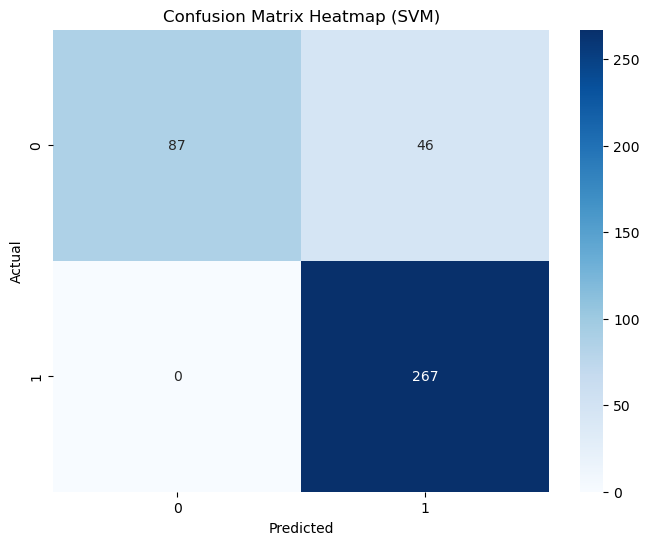

In [42]:
# Visualization - Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (SVM)')
plt.show()

In [44]:
# SVM Implementation - Basic Model (with scaled data)
svm = SVC(kernel='poly',class_weight='balanced') # Try linear first
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print("\nBasic SVM Performance (Scaled Data):")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Basic SVM Performance (Scaled Data):
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       133
           1       0.86      0.89      0.87       267

    accuracy                           0.83       400
   macro avg       0.81      0.80      0.81       400
weighted avg       0.83      0.83      0.83       400

[[ 95  38]
 [ 30 237]]


In [45]:
# SVM Implementation - Basic Model (with scaled data)
svm = SVC(kernel='rbf',class_weight='balanced') # Try linear first
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

print("\nBasic SVM Performance (Scaled Data):")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Basic SVM Performance (Scaled Data):
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       133
           1       0.85      0.87      0.86       267

    accuracy                           0.81       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.81      0.81      0.81       400

[[ 92  41]
 [ 35 232]]


Comparison (including linear kernel):

Linear Kernel (linear): Worst performance (accuracy 0.52, macro avg f1-score 0.51). Very poor precision for class 0 (0.35).
Polynomial Kernel (poly): Best performance (accuracy 0.83, macro avg f1-score 0.81). Best at classifying class 0.
Radial Basis Function Kernel (rbf): Middle performance (accuracy 0.81, macro avg f1-score 0.78).


Conclusion:

The polynomial kernel (poly) performs best, followed by the radial basis function (rbf), while the linear kernel (linear) performs significantly worse.

1) SVM Strengths (Mushroom Dataset):

- Handles categorical data well (after encoding).
- Effective with non-linear relationships (polynomial, RBF kernels).
- Benefits from feature scaling.

2) SVM Weaknesses (Mushroom Dataset):

- Highly sensitive to kernel choice.
- Struggles with class imbalance (needs class_weight='balanced').
- Can be computationally expensive.
- Difficult to interpret (black box).
- Risk of overfitting with complex kernels.

SVM Practical Implications (Short):

- Image/Object Recognition: Facial, medical, autonomous driving.
- Text Analysis: Spam detection, sentiment, news categorization.
- Medical/Bioinformatics: Disease diagnosis, gene/protein analysis.
- Fraud Detection: Credit card, insurance.
- Finance: Stock prediction, credit risk.
- Remote Sensing: Land cover classification.